In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [2]:
data = pd.read_csv('minute_weather.csv')

In [3]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(17886, 13)

In [4]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [5]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [6]:
sampled_df.columns


Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [7]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [8]:
select_df = sampled_df[features]
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [9]:
X = StandardScaler().fit_transform(select_df)

In [56]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [57]:
centers = model.cluster_centers_
label=model.predict(X)
label

array([8, 0, 8, ..., 8, 0, 8], dtype=int32)

In [58]:
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['class'] = P['prediction'].astype(int)
	return P

In [59]:
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g','k','orange']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'class', color = my_colors, marker='o')

In [60]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction,class
0,0.008271,0.862888,0.396539,-0.653773,0.598462,-0.655215,-0.529860,0.0,0
1,-1.108986,-1.170875,0.540279,0.501951,0.658006,0.503262,1.477622,1.0,1
2,1.109278,-0.530877,-0.923280,2.108744,-0.850745,2.163532,-0.888218,2.0,2
3,-0.018361,0.311366,-0.947469,0.816979,-0.886557,0.798594,-0.594225,3.0,3
4,-0.189484,-0.995601,-0.982874,-0.525163,-0.830785,-0.529785,0.902865,4.0,4
5,1.655989,0.098632,-0.850267,-0.112776,-0.722708,-0.100253,-0.961406,5.0,5
6,-0.299093,0.598367,0.569502,0.563404,0.683399,0.499931,-0.120655,6.0,6
7,0.124844,0.532700,1.589831,-0.691018,1.876419,-0.654619,-0.585281,7.0,7
8,-0.133806,0.809241,-1.033267,-0.555868,-0.943730,-0.589743,-0.509918,8.0,8
9,-0.025068,0.014142,2.013812,-0.668396,-1.315908,-0.586892,0.070700,9.0,9


In [61]:
plt(P)

TypeError: 'module' object is not callable

In [ ]:
plt.scatter(select_df['air_pressure'],select_df['air_temp'])
plt.show()

In [ ]:
parallel_plot(P[P['air_temp'] > 0.5])

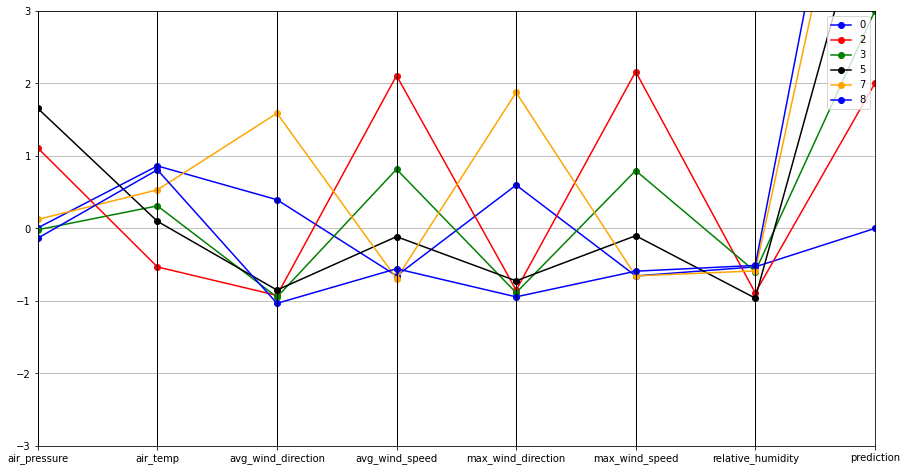

In [63]:
parallel_plot(P[P['relative_humidity'] < -0.5])

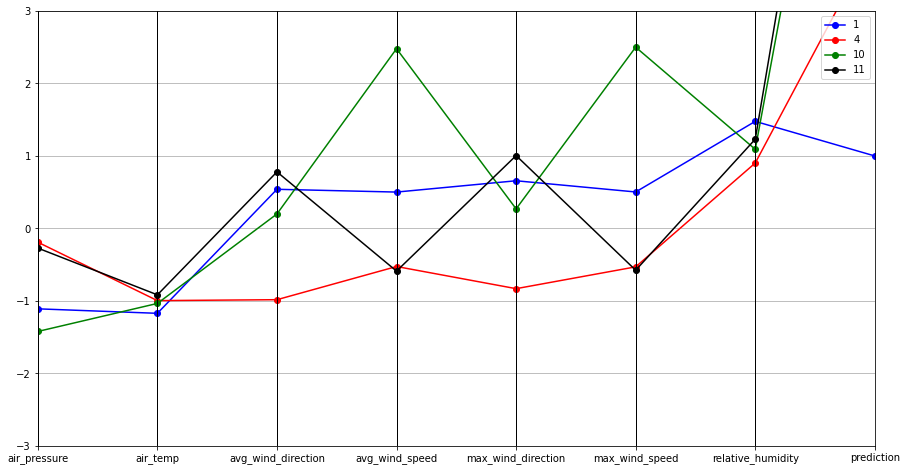

In [62]:

parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])